In [ ]:
!which python

In [9]:
import re
import random
import warnings
import unidecode

import numpy as np
import pandas as pd
import csv
from typing import List
from Levenshtein import distance 
import import_ipynb
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from preprocessing.amharicSegmenter import AmharicSegmenter
from preprocessing.normalizer import normalize
warnings.filterwarnings('ignore')

In [10]:
sent_punct = []
word_punct = []
amseg = AmharicSegmenter(sent_punct,word_punct)

In [13]:
import os
all_tokens =[]
for root, dirs, files in os.walk('final/all/'):
    print(files)
    for file in files:
        print (file)
        with open('final/all/' + file, "r",encoding="utf-8") as f: 
            for line in f:     
                tokens = amseg.amharic_tokenizer(line)
                tokens = [token.text for token in tokens]
                all_tokens += tokens
all_unique_tokens = set(all_tokens)
print("All Tokens =",len(all_tokens))
print("Unique Tokens =",len(all_unique_tokens))


['all_final_sentences.txt']
all_final_sentences.txt
All Tokens = 104352693
Unique Tokens = 3488919


In [1]:
All Tokens = 4719782
Unique Tokens = 530659

SyntaxError: invalid syntax (<ipython-input-1-b0b97b66c85a>, line 1)

In [14]:
AM = ['ሀ','ሁ','ሂ','ሃ','ሄ','ህ','ሆ','ለ','ሉ','ሊ','ላ','ሌ','ል','ሎ','ሐ','ሑ','ሒ','ሓ','ሔ','ሕ','ሖ',
      'መ','ሙ','ሚ','ማ','ሜ','ም','ሞ','ሠ','ሡ','ሢ','ሣ','ሤ','ሥ','ሦ','ረ','ሩ','ሪ','ራ','ሬ','ር','ሮ',
      'ሰ','ሱ','ሲ','ሳ','ሴ','ስ','ሶ','ሸ','ሹ','ሺ','ሻ','ሼ','ሽ','ሾ','ቀ','ቁ','ቂ','ቃ','ቄ','ቅ','ቆ',
      'በ','ቡ','ቢ','ባ','ቤ','ብ','ቦ','ቨ','ቩ','ቪ','ቫ','ቬ','ቭ','ቮ','ተ','ቱ','ቲ','ታ','ቴ','ት','ቶ',
      'ቸ','ቹ','ቺ','ቻ','ቼ','ች','ቾ','ኀ','ኁ','ኂ','ኃ','ኄ','ኅ','ኆ','ነ','ኑ','ኒ','ና','ኔ''ን','ኖ',
      'ኘ','ኙ','ኚ','ኛ','ኜ','ኝ','ኞ','አ','ኡ','ኢ','ኣ','ኤ','እ','ኦ','ከ','ኩ','ኪ','ካ','ኬ','ክ','ኮ',
      'ኸ','ኹ','ኺ','ኻ','ኼ','ኽ','ኾ','ወ','ዉ','ዊ','ዋ','ዌ','ው','ዎ','ዐ','ዑ','ዒ','ዓ','ዔ','ዕ','ዖ',
      'ዘ','ዙ','ዚ','ዛ','ዜ','ዝ','ዞ','ዠ','ዡ','ዢ','ዣ','ዤ','ዥ','ዦ','የ','ዩ','ዪ','ያ','ዬ','ይ','ዮ',
      'ደ','ዱ','ዲ','ዳ','ዴ','ድ','ዶ','ጀ','ጁ','ጂ','ጃ','ጄ','ጅ','ጆ','ገ','ጉ','ጊ','ጋ','ጌ','ግ','ጎ',
      'ጠ','ጡ','ጢ','ጣ','ጤ','ጥ','ጦ','ጨ','ጩ','ጪ','ጫ','ጬ','ጭ','ጮ','ጰ','ጱ','ጲ','ጳ','ጴ','ጵ','ጶ',
      'ጸ','ጹ','ጺ','ጻ','ጼ','ጽ','ጾ','ፀ','ፁ','ፂ','ፃ','ፄ','ፅ','ፆ','ፈ','ፉ','ፊ','ፋ','ፌ','ፍ','ፎ',
      'ፐ','ፑ','ፒ','ፓ','ፔ','ፕ','ፖ']

In [15]:
len(AM)

237

In [16]:
homo_char1 =['ሀ','ሁ', 'ሂ', 'ሃ', 'ሄ', 'ህ', 'ሆ', 'ሐ', 'ሑ', 'ሒ', 'ሓ', 'ሔ', 'ሕ', 'ሖ', 
               'ኀ', 'ኁ', 'ኂ', 'ኃ', 'ኄ', 'ኅ', 'ኆ', 'ኸ', 'ኹ', 'ኺ', 'ኻ', 'ኼ', 'ኽ', 'ኾ', 
               'አ', 'ኡ', 'ኢ', 'ኣ', 'ኤ', 'እ', 'ኦ', 'ዐ', 'ዑ', 'ዒ', 'ዓ', 'ዔ', 'ዕ', 'ዖ', 
               'ሰ', 'ሱ', 'ሲ', 'ሳ', 'ሴ', 'ስ', 'ሶ', 'ሠ', 'ሡ', 'ሢ', 'ሣ', 'ሤ', 'ሥ', 'ሦ', 
               'ጸ', 'ጹ', 'ጺ', 'ጻ', 'ጼ', 'ጽ', 'ጾ', 'ፀ', 'ፁ', 'ፂ', 'ፃ', 'ፄ', 'ፅ', 'ፆ','ሗ','ኋ', 'ዃ']

In [17]:
homo_char2 = ['ሸ','ሼ','ሺ','ሽ','ቸ','ቼ','ቺ','ች','ኘ','ኜ','ኚ','ኝ','ወ','ዎ','ዉ','ው','ዠ','ዤ','ዢ','ዥ',
                 'የ','ዬ','ዪ','ይ','ጀ','ጄ','ጂ','ጅ','ጨ','ጬ','ጪ','ጭ','ደ', 'ዴ', 'ድ', 'ዲ']

# Dictionary of all tokens with frequency

In [18]:
#frequency of all tokens
freq_tokens = {}
for t in all_tokens:
    freq_tokens[t] = freq_tokens.get(t, 0) + 1

In [19]:
#frequency tokens that contain homophone character
homo_tokens = {}
for k,v in freq_tokens.items():
    for hm in homo_char1:
        if hm in k:
            homo_tokens[k]=v

In [20]:
#frequency of top 50 homophone tokens
homo_tokens_top=dict(sorted(homo_tokens.items(), key=lambda item: item[1],reverse=True)[:50])
homo_tokens_top

{'እና': 586022,
 'ውስጥ': 385616,
 'አንድ': 240587,
 'ሰው': 219036,
 'ሰዎች': 199420,
 'እንደ': 180557,
 'ይህ': 172356,
 'አቶ': 167879,
 'ሁሉ': 156575,
 'የኢትዮጵያ': 155453,
 'አበባ': 142246,
 'አዲስ': 138631,
 'ኢትዮጵያ': 138203,
 'በኋላ': 135252,
 'በዚህ': 129318,
 'አሁን': 129274,
 'እንጂ': 120548,
 'መንግስት': 117816,
 'ህዝብ': 116949,
 'አይደለም': 116797,
 'ሲሆን': 114978,
 'ሁኔታ': 110748,
 'መሆኑን': 105079,
 'ዓመት': 103304,
 'እኔ': 101470,
 'እስከ': 98397,
 'እንዲህ': 98330,
 'ስለ': 90754,
 'ይህን': 89280,
 'እንዴት': 89097,
 'ሆነ': 86897,
 'እንዲሁም': 86701,
 'ሳይሆን': 85422,
 'ከዚህ': 85379,
 'ስራ': 83875,
 'ሁለት': 83530,
 'ድረስ': 82502,
 'አለ': 81092,
 'በኢትዮጵያ': 80551,
 'ሆኖ': 80543,
 'መንግሥት': 79828,
 'እንደሆነ': 79818,
 'ሥራ': 73879,
 'ያህል': 73539,
 'አገር': 72336,
 'እንኳን': 70380,
 'ትምህርት': 66293,
 'ሀገር': 64887,
 'ዓለም': 62746,
 'ቅዱስ': 59237}

# Homophone character frequency

In [21]:
#homo_char1 =['ሀ','ሁ', 'ሂ', 'ሃ', 'ሄ', 'ህ', 'ሆ', 'ሐ', 'ሑ',...]
frq_homo_char={}
for h in homo_char1:
    hm=(len([w for w in all_tokens if h in w]))
    frq_homo_char[h] =hm
#print in sorted order
#frq_homo_char=dict(sorted(frq_homo_char.items(), key=lambda item: item[1],reverse=True))
frq_homo_char

{'ሀ': 659664,
 'ሁ': 1976208,
 'ሂ': 109729,
 'ሃ': 674850,
 'ሄ': 470674,
 'ህ': 3349055,
 'ሆ': 2133120,
 'ሐ': 358241,
 'ሑ': 37002,
 'ሒ': 15060,
 'ሓ': 54003,
 'ሔ': 203691,
 'ሕ': 573343,
 'ሖ': 77827,
 'ኀ': 9379,
 'ኁ': 470,
 'ኂ': 615,
 'ኃ': 255307,
 'ኄ': 2302,
 'ኅ': 97637,
 'ኆ': 522,
 'ኸ': 48487,
 'ኹ': 12045,
 'ኺ': 641,
 'ኻ': 4683,
 'ኼ': 9918,
 'ኽ': 11297,
 'ኾ': 20869,
 'አ': 10070456,
 'ኡ': 36155,
 'ኢ': 1170676,
 'ኣ': 101537,
 'ኤ': 444982,
 'እ': 7155404,
 'ኦ': 342565,
 'ዐ': 74280,
 'ዑ': 28456,
 'ዒ': 6240,
 'ዓ': 904344,
 'ዔ': 18633,
 'ዕ': 524998,
 'ዖ': 11384,
 'ሰ': 3931151,
 'ሱ': 789515,
 'ሲ': 1153119,
 'ሳ': 2240940,
 'ሴ': 367306,
 'ስ': 8692991,
 'ሶ': 328618,
 'ሠ': 313168,
 'ሡ': 13248,
 'ሢ': 3198,
 'ሣ': 116255,
 'ሤ': 3323,
 'ሥ': 713868,
 'ሦ': 51940,
 'ጸ': 239189,
 'ጹ': 68718,
 'ጺ': 3168,
 'ጻ': 182762,
 'ጼ': 6754,
 'ጽ': 511820,
 'ጾ': 25434,
 'ፀ': 232275,
 'ፁ': 56613,
 'ፂ': 5838,
 'ፃ': 213897,
 'ፄ': 14547,
 'ፅ': 259407,
 'ፆ': 22277,
 'ሗ': 3759,
 'ኋ': 200806,
 'ዃ': 1200}

In [22]:
#homo_char2 = ['ሸ','ሼ','ሺ','ሽ','ቸ','ቼ','ቺ','ች','ኘ','ኜ',...]
frq_homo_char2={}
for h in homo_char2:
    hm=(len([w for w in all_tokens if h in w]))
    frq_homo_char2[h] =hm
frq_homo_char2

{'ሸ': 372613,
 'ሼ': 35583,
 'ሺ': 159913,
 'ሽ': 864337,
 'ቸ': 2196310,
 'ቼ': 113457,
 'ቺ': 55369,
 'ች': 5584771,
 'ኘ': 293184,
 'ኜ': 10203,
 'ኚ': 16656,
 'ኝ': 906350,
 'ወ': 3581667,
 'ዎ': 1605734,
 'ዉ': 518274,
 'ው': 10962136,
 'ዠ': 10857,
 'ዤ': 4880,
 'ዢ': 25620,
 'ዥ': 83293,
 'የ': 11890809,
 'ዬ': 211438,
 'ዪ': 12451,
 'ይ': 7242859,
 'ጀ': 805564,
 'ጄ': 63169,
 'ጂ': 234709,
 'ጅ': 715898,
 'ጨ': 534335,
 'ጬ': 5308,
 'ጪ': 87460,
 'ጭ': 526413,
 'ደ': 5307330,
 'ዴ': 504792,
 'ድ': 4380742,
 'ዲ': 1443750}

# Amharic Fidelat statistics

In [23]:
frq_char={}
for c in AM:
    amc=(len([w for w in all_tokens if c in w]))
    frq_char[c] =amc
#print Top sorted 30 
frq_char_top=dict(sorted(frq_char.items(), key=lambda item: item[1],reverse=True)[:40])
frq_char_top

{'ት': 13669230,
 'የ': 11890809,
 'ው': 10962136,
 'በ': 10954059,
 'አ': 10070456,
 'ር': 9661673,
 'መ': 9032753,
 'ም': 8951630,
 'ለ': 8872850,
 'ል': 8835034,
 'ስ': 8692991,
 'ይ': 7242859,
 'እ': 7155404,
 'ተ': 7154409,
 'ነ': 6967291,
 'ያ': 6843235,
 'ና': 5600809,
 'ች': 5584771,
 'ደ': 5307330,
 'ብ': 5021205,
 'ገ': 4981581,
 'ማ': 4928757,
 'ላ': 4763457,
 'ግ': 4742043,
 'ከ': 4680724,
 'ረ': 4464095,
 'ድ': 4380742,
 'ራ': 4054864,
 'ሰ': 3931151,
 'ባ': 3848534,
 'ታ': 3716379,
 'ሚ': 3598417,
 'ወ': 3581667,
 'ህ': 3349055,
 'ክ': 2825400,
 'ቀ': 2765877,
 'ጥ': 2762043,
 'ጠ': 2467499,
 'ቅ': 2298842,
 'ሳ': 2240940}

# graphical representation

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
dpi=300
plt.figure(figsize=(8, 6), edgecolor='black', linewidth=0.5)
prop = fm.FontProperties(fname='AbyssinicaSIL-Regular.ttf', weight='bold')
#prop = fm.FontProperties(fname='Chiret-Regular.ttf', weight='bold')

<Figure size 576x432 with 0 Axes>

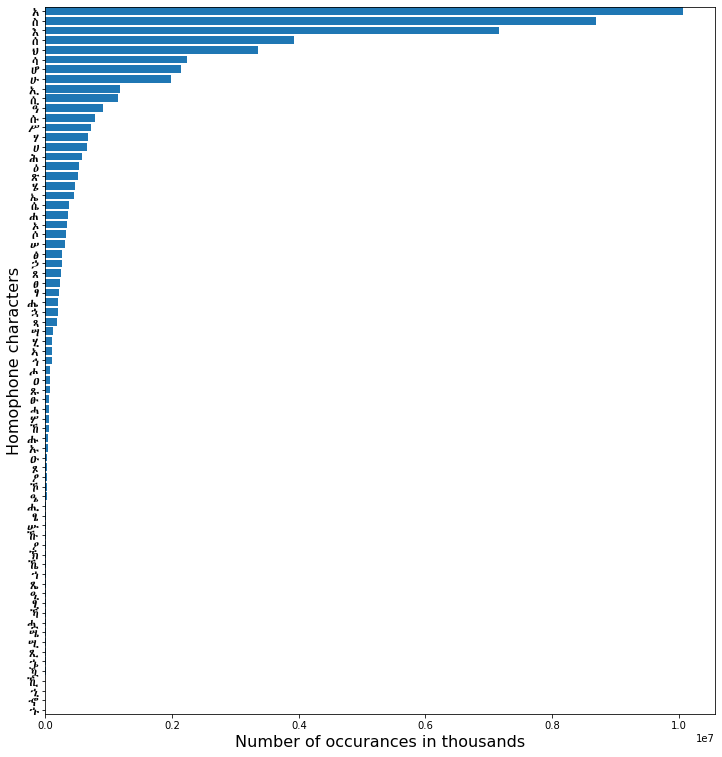

In [25]:
#homo_char1 =['ሀ','ሁ', 'ሂ', 'ሃ', 'ሄ', 'ህ', 'ሆ', 'ሐ', 'ሑ',...]
sorted_dict = dict( sorted(frq_homo_char.items(),key=lambda item: item[1]))
f, ax = plt.subplots(figsize=(12,13))
plt.barh(*zip(*sorted_dict.items()))
plt.yticks(fontproperties=prop, fontsize = 12)#ha='center',
#plt.title("Homophone character Statistics from the data set", size=16)
plt.ylabel("Homophone characters", size=16)
plt.xlabel("Number of occurances in thousands", size=16)
plt.margins(y=0)
plt.show()

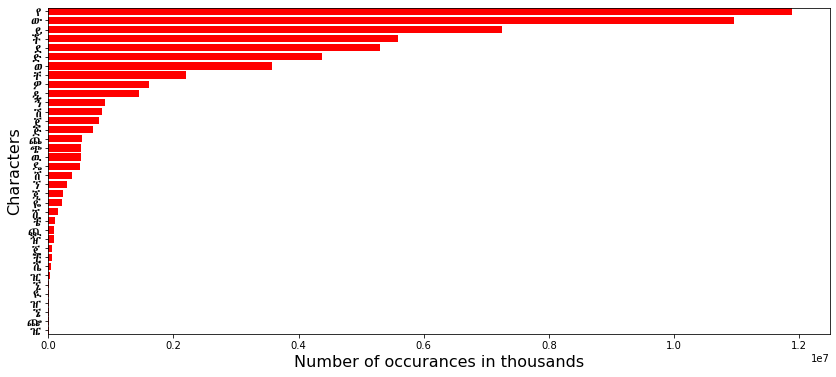

In [26]:
#homo_char2 = ['ሸ','ሼ','ሺ','ሽ','ቸ','ቼ','ቺ','ች','ኘ','ኜ',...]
sorted_dict2 = dict( sorted(frq_homo_char2.items(),key=lambda item: item[1]))
f, ax = plt.subplots(figsize=(14,6))
plt.barh(*zip(*sorted_dict2.items()),color='red',label='A')
plt.yticks(fontproperties=prop, fontsize = 12)
#plt.title("Character Statistics from the data set", size=16)
plt.ylabel("Characters", size=16)
plt.xlabel("Number of occurances in thousands", size=16)
plt.margins(y=0)
plt.show()

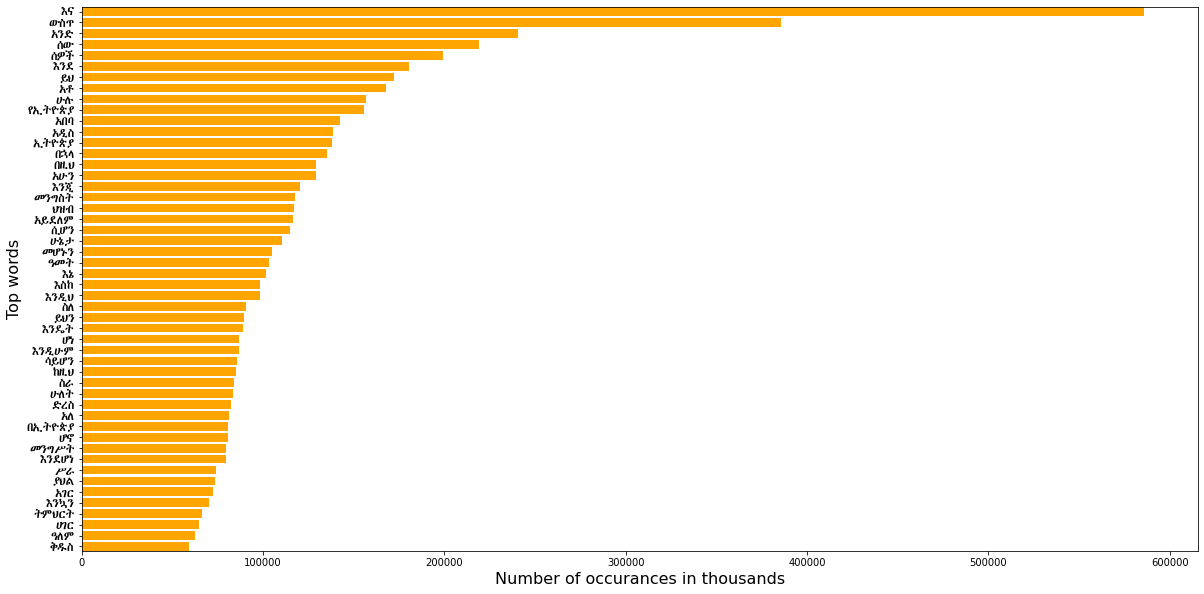

In [27]:
homo_tokens_top=dict(sorted(homo_tokens.items(), key=lambda item: item[1],reverse=True)[:50])

sorted_dict3 = dict( sorted(homo_tokens_top.items(),key=lambda item: item[1]))
f, ax = plt.subplots(figsize=(20,10))
plt.barh(*zip(*sorted_dict3.items()),color='orange')
plt.yticks(fontproperties=prop,  fontsize = 12)
plt.ylabel("Top words", size=16)
plt.xlabel("Number of occurances in thousands", size=16)
plt.margins(y=0)
plt.show()

# frequency of  homophone words

In [28]:
h1 = ['ሀ', 'ሐ', 'ኀ', 'ሃ', 'ሓ', 'ኃ', 'ኻ']
h2 = ['ሁ', 'ሑ', 'ኁ', 'ኹ']
h3 = ['ሂ', 'ሒ', 'ኂ', 'ኺ']
h4 = ['ሄ', 'ሔ', 'ኄ', 'ኼ']
h5 = ['ህ', 'ሕ', 'ኅ', 'ኽ']
h7 = ['ሆ', 'ሖ', 'ኆ', 'ኾ']
a1 = ['አ', 'ኣ', 'ዐ', 'ዓ']
a2 = ['ኡ', 'ዑ']
a3 = ['ኢ', 'ዒ']
a4 = ['ኤ', 'ዔ']
a5 = ['እ', 'ዕ']
a7 = ['ኦ', 'ዖ']
s1 = ['ሰ', 'ሠ']
s2 = ['ሱ', 'ሡ']
s3 = ['ሲ', 'ሢ']
s4 = ['ሳ', 'ሣ']
s5 = ['ሴ', 'ሤ']
s6 = ['ስ', 'ሥ']
s7 = ['ሶ', 'ሦ']
ts1 = ['ጸ', 'ፀ']
ts2 = ['ጹ', 'ፁ']
ts3 = ['ጺ', 'ፂ']
ts4 = ['ጻ', 'ፃ']
ts5 = ['ጼ', 'ፄ']
ts6 = ['ጽ', 'ፅ']
ts7 = ['ጾ', 'ፆ']
homo = [h1,h2,h3,h4,h5,h7,a1,a2,a3,a4,a5,a7,s1,s2,s3,s4,s5,s6,s7,ts1,ts2,ts3,ts4,ts5,ts6,ts7]

In [29]:
homo_tokens_top=dict(sorted(homo_tokens.items(), key=lambda item: item[1],reverse=True)[:1000])

In [30]:
frq_homo_wrd1 ={}
count=0
for word in homo_tokens_top:
    count +=1
    if count%1000==0:
        print(count)
    for ho in homo:
        for h in ho:
            if h in word:
                hm=(len([m for m in homo_tokens if word in m ]))
                frq_homo_wrd1[word] =hm 
                for h2 in ho:
                    if h2 == h:
                        continue
                    w = word.replace(h,h2)
                    hm=(len([m for m in homo_tokens if w in m ]))
                    frq_homo_wrd1[w] =hm



1000


In [31]:
frq_homo_wrd1

{'እና': 13204,
 'ዕና': 498,
 'ውስጥ': 1267,
 'ውሥጥ': 27,
 'አንድ': 4197,
 'ኣንድ': 177,
 'ዐንድ': 10,
 'ዓንድ': 13,
 'ሰው': 12033,
 'ሠው': 843,
 'ሰዎች': 978,
 'ሠዎች': 39,
 'እንደ': 64211,
 'ዕንደ': 20,
 'ይህ': 2593,
 'ይሕ': 100,
 'ይኅ': 16,
 'ይኽ': 116,
 'አቶ': 1744,
 'ኣቶ': 51,
 'ዐቶ': 19,
 'ዓቶ': 212,
 'ሁሉ': 2029,
 'ሑሉ': 11,
 'ኁሉ': 4,
 'ኹሉ': 37,
 'የኢትዮጵያ': 1337,
 'የዒትዮጵያ': 1,
 'አበባ': 1182,
 'ኣበባ': 47,
 'ዐበባ': 1,
 'ዓበባ': 1,
 'አዲስ': 1867,
 'ኣዲስ': 50,
 'ዐዲስ': 8,
 'ዓዲስ': 7,
 'አዲሥ': 15,
 'ኢትዮጵያ': 6072,
 'ዒትዮጵያ': 6,
 'በዚህ': 573,
 'በዚሕ': 8,
 'በዚኅ': 1,
 'በዚኽ': 10,
 'አሁን': 1293,
 'አሑን': 6,
 'አኁን': 1,
 'አኹን': 13,
 'ኣሁን': 69,
 'ዐሁን': 4,
 'ዓሁን': 4,
 'እንጂ': 765,
 'ዕንጂ': 1,
 'መንግስት': 2054,
 'መንግሥት': 839,
 'ህዝብ': 1650,
 'ሕዝብ': 702,
 'ኅዝብ': 9,
 'ኽዝብ': 2,
 'አይደለም': 749,
 'ኣይደለም': 24,
 'ዐይደለም': 1,
 'ዓይደለም': 5,
 'ሲሆን': 422,
 'ሲሖን': 10,
 'ሲኆን': 0,
 'ሲኾን': 12,
 'ሢሆን': 4,
 'ሁኔታ': 918,
 'ሑኔታ': 1,
 'ኁኔታ': 1,
 'ኹኔታ': 48,
 'መሆኑን': 413,
 'መሖኑን': 1,
 'መኆኑን': 1,
 'መኾኑን': 18,
 'ዓመት': 762,
 'አመት': 716,
 'ኣመት': 37,
 'ዐመት': 19,
 'እኔ': 2156,
 'ዕ

In [41]:
with open("homo_frew.txt","w") as f:
    for key in frq_homo_wrd1:
        f.write(key +"\t"+str(frq_homo_wrd1[key])+ "\n")
 